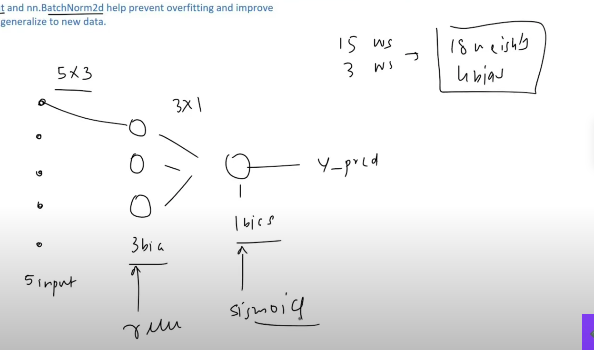

In [ ]:
# create model class
import torch
import torch.nn as nn #lib import

class Model(nn.Module): #class shld inherit from nn.Module class

  def __init__(self, num_features): #constructor - input featues

    super().__init__() #parent class ka constructor ko invoke using super

    # self.linear(num_features, 1) #5 input 1 o/p
    # self.sigmod = nn.Sigmoid()

    #self.linear = nn.Linear(num_features,3)
    #self.relu = nn.ReLU()
    #self.linear2 = nn.Linear(3,1)
    # self.sigmoid  = nn.Sigmoid()

    self.network = nn.Sequential( #har baar out = out = nai likhna pade isliye container hote h
                                 # Sequential container
        nn.Linear(num_features, 3), # (inpute m kitne cheeze , output kitne)
        nn.ReLU(),
        nn.Linear(3, 1),
        nn.Sigmoid()
    )




  def forward(self, features): #self becos ye ek method h and take in features
    # out = self.linear1(features)
    # out - self.relu(out)
    # out = self.linear2(out)
    # out = self.sigmoid(out)



    out = self.network(features) #basically calcing Wx+b and then sigmoid



    return out

In [ ]:
# create dataset
features = torch.rand(10,5)

# create model
model = Model(features.shape[1]) #kitne features h

# call model for forward pass
# model.forward(features) #not recommened for calling forward functiosn #magic words something __call__
model(features) #auto trigger forward method

tensor([[0.6188],
        [0.6139],
        [0.6124],
        [0.6172],
        [0.6167],
        [0.6180],
        [0.6211],
        [0.6171],
        [0.6156],
        [0.6220]], grad_fn=<SigmoidBackward0>)

In [ ]:
# show model weights
model.linear2.weight  #.bias for biases

Parameter containing:
tensor([[0.5021, 0.5738, 0.4083]], requires_grad=True)

In [ ]:
!pip install torchinfo #to visualize the model

In [ ]:
from torchinfo import summary

summary(model, input_size=(10, 5)) #get summary ( model m input size)

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00